In [ ]:
#7.2.4 ARIMA(Autoregressive Integrated Moving Average) 모델

In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving sales.csv to sales.csv


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Mon, 29 Mar 2021   AIC                            408.699
Time:                        10:09:29   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.003       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     

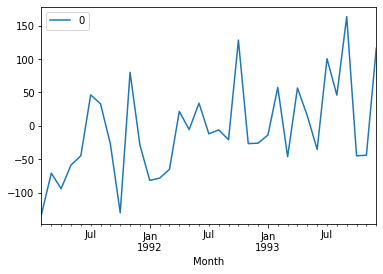

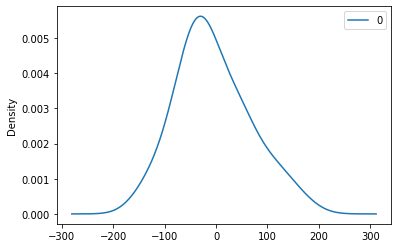

                0
count   35.000000
mean    -5.569325
std     70.272662
min   -132.525630
25%    -45.563866
50%    -20.763571
75%     39.933127
max    163.552083


In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=354.377671, expected=346.300000
predicted=288.627344, expected=329.700000
predicted=382.818006, expected=445.400000
predicted=339.543868, expected=325.900000
predicted=392.897227, expected=449.300000
predicted=354.487850, expected=411.300000
predicted=452.200124, expected=417.400000
predicted=406.806186, expected=545.500000
predicted=430.162063, expected=477.600000
predicted=492.745322, expected=687.000000
predicted=493.604475, expected=435.300000
predicted=657.397091, expected=587.300000
predicted=522.091126, expected=676.900000
Test MSE: 8074.987


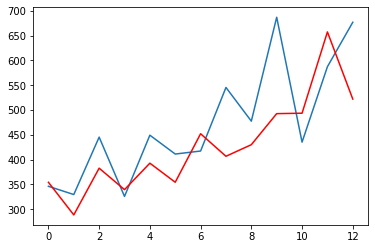

In [ ]:
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')
 
series = read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# 7.4.1 RNN Cell

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(22)
np.random.seed(22)
assert tf.__version__.startswith('2.')

batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size, drop_remainder=True)
print('x_train_shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test_shape:', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)
(128, 80)


In [ ]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units): 
        super(RNN_Build, self).__init__()
        
        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.RNNCell0 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.RNNCell1 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0  
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units) 
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 14s 43ms/step - loss: 0.6838 - accuracy: 0.5373
Epoch 2/4
195/195 [==============================] - 12s 62ms/step - loss: 0.3503 - accuracy: 0.8509 - val_loss: 0.4130 - val_accuracy: 0.8194
Epoch 3/4
195/195 [==============================] - 8s 42ms/step - loss: 0.1853 - accuracy: 0.9326
Epoch 4/4
195/195 [==============================] - 10s 52ms/step - loss: 0.0786 - accuracy: 0.9723 - val_loss: 0.6602 - val_accuracy: 0.7954


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0282, accuracy: 99.2949%
테스트 데이터셋 평가...
loss=0.6602, accuracy: 79.5393%
시간: 84.21811366081238


In [ ]:
# 7.4.2 RNN층(Layer)

In [ ]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True),
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 18s 85ms/step - loss: 0.6391 - accuracy: 0.6034
Epoch 2/4
195/195 [==============================] - 20s 105ms/step - loss: 0.3612 - accuracy: 0.8465 - val_loss: 0.3899 - val_accuracy: 0.8308
Epoch 3/4
195/195 [==============================] - 17s 85ms/step - loss: 0.2839 - accuracy: 0.8857
Epoch 4/4
195/195 [==============================] - 20s 104ms/step - loss: 0.2408 - accuracy: 0.9083 - val_loss: 0.5231 - val_accuracy: 0.8171


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1723, accuracy: 93.1130%
테스트 데이터셋 평가...
loss=0.5231, accuracy: 81.7067%
시간: 83.84105396270752


In [ ]:
# 7.5.2 LSTM Cell

In [ ]:
class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    

            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)

        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 40s 141ms/step - loss: 0.5740 - accuracy: 0.6707
Epoch 2/4
195/195 [==============================] - 37s 192ms/step - loss: 0.3142 - accuracy: 0.8716 - val_loss: 0.3617 - val_accuracy: 0.8397
Epoch 3/4
195/195 [==============================] - 27s 141ms/step - loss: 0.2539 - accuracy: 0.8986
Epoch 4/4
195/195 [==============================] - 34s 176ms/step - loss: 0.2250 - accuracy: 0.9139 - val_loss: 0.4071 - val_accuracy: 0.8243


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1755, accuracy: 93.8301%
테스트 데이터셋 평가...
loss=0.4071, accuracy: 82.4319%
시간: 155.43860816955566


In [ ]:
#7.5.3 LSTM Layer

In [ ]:
class LSTM_Build(tf.keras.Model):

    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.LSTM(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.LSTM(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)

        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 45s 157ms/step - loss: 0.5802 - accuracy: 0.6555
Epoch 2/4
195/195 [==============================] - 44s 225ms/step - loss: 0.3212 - accuracy: 0.8669 - val_loss: 0.3646 - val_accuracy: 0.8386
Epoch 3/4
195/195 [==============================] - 31s 157ms/step - loss: 0.2526 - accuracy: 0.9014
Epoch 4/4
195/195 [==============================] - 40s 208ms/step - loss: 0.2114 - accuracy: 0.9227 - val_loss: 0.3959 - val_accuracy: 0.8353


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1434, accuracy: 95.6370%
테스트 데이터셋 평가...
loss=0.3959, accuracy: 83.5256%
시간: 181.59970617294312


In [ ]:
#7.6.2 GRU Cell

In [ ]:
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):    
            out0, state0 = self.RNNCell0(word, state0, training)   
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 35s 100ms/step - loss: 0.6135 - accuracy: 0.6210
Epoch 2/4
195/195 [==============================] - 28s 145ms/step - loss: 0.3336 - accuracy: 0.8575 - val_loss: 0.3792 - val_accuracy: 0.8375
Epoch 3/4
195/195 [==============================] - 20s 100ms/step - loss: 0.2694 - accuracy: 0.8913
Epoch 4/4
195/195 [==============================] - 24s 124ms/step - loss: 0.2379 - accuracy: 0.9073 - val_loss: 0.3830 - val_accuracy: 0.8355


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1760, accuracy: 94.3590%
테스트 데이터셋 평가...
loss=0.3830, accuracy: 83.5537%
시간: 116.63064002990723


In [ ]:
#7.6.3 GRU Layer

In [ ]:
class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.GRU(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.GRU(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):

        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob

In [ ]:
import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
    
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              experimental_run_tf_function=False)
    
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 40s 112ms/step - loss: 0.6176 - accuracy: 0.6231
Epoch 2/4
195/195 [==============================] - 32s 166ms/step - loss: 0.3125 - accuracy: 0.8705 - val_loss: 0.3625 - val_accuracy: 0.8390
Epoch 3/4
195/195 [==============================] - 22s 112ms/step - loss: 0.2620 - accuracy: 0.8955
Epoch 4/4
195/195 [==============================] - 28s 145ms/step - loss: 0.2138 - accuracy: 0.9211 - val_loss: 0.4011 - val_accuracy: 0.8328


In [ ]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1444, accuracy: 95.3686%
테스트 데이터셋 평가...
loss=0.4011, accuracy: 83.2812%
시간: 135.4311637878418


In [ ]:
#7.8.2 양방향 RNN 예시

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

n_unique_words = 10000 
maxlen = 200
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/4
196/196 [==============================] - 116s 575ms/step - loss: 0.5543 - accuracy: 0.6847 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/4
196/196 [==============================] - 112s 572ms/step - loss: 0.2324 - accuracy: 0.9160 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/4
196/196 [==============================] - 112s 572ms/step - loss: 0.1617 - accuracy: 0.9433 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/4
196/196 [==============================] - 112s 571ms/step - loss: 0.1255 - accuracy: 0.9572 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = model.evaluate(x_train, y_train, batch_size=384, verbose=1)
print ('Training accuracy', model.metrics_names, acc)
print ('Training accuracy', model.metrics_names, loss)
loss, acc = model.evaluate(x_test, y_test, batch_size=384, verbose=1)
print ('Testing accuracy', model.metrics_names, acc)
print ('Testing accuracy', model.metrics_names, loss)

66/66 [==============================] - 30s 444ms/step - loss: 0.1554 - accuracy: 0.9480
Training accuracy ['loss', 'accuracy'] 0.9480400085449219
Training accuracy ['loss', 'accuracy'] 0.1554034799337387
66/66 [==============================] - 29s 444ms/step - loss: 0.3609 - accuracy: 0.8526
Testing accuracy ['loss', 'accuracy'] 0.8526399731636047
Testing accuracy ['loss', 'accuracy'] 0.3609127700328827
